In [1]:
%load_ext autoreload
%autoreload 2
import sys
import torch
import copy
from torch import nn
from torch.utils import data
sys.path.append('..')
# sys.path.append('/system/user/beck/pwbeck/projects/regularization/ml_utilities')
from omegaconf import OmegaConf, DictConfig
from ml_utilities.torch_models import get_model_class
from ml_utilities.torch_utils import gradients_to_vector
from erank.data.datasetgenerator import DatasetGenerator
from erank.gradients import GradientCalculator
import matplotlib.pyplot as plt
gpu_id = 0

## Setup

In [2]:
model_cfg = """
model:
  name: cnn2d
  out_channels: 64
  out_units: 10
  model_kwargs:
    image_size: 28
    in_channels: 1
    act_fn: relu
    layer_configs:
      - out_channels: ${model.out_channels}
        kernel_size: 3
        batch_norm: true
        stride: 1
        padding: 0
        max_pool_kernel_size: 2
      - out_channels: ${model.out_channels}
        kernel_size: 3
        batch_norm: true
        stride: 1
        padding: 0
        max_pool_kernel_size: 2
      - out_channels: ${model.out_channels}
        kernel_size: 3
        batch_norm: true
        stride: 1
        padding: 0
      - out_channels: ${model.out_channels}
        kernel_size: 3
        batch_norm: true
        stride: 1
        padding: 0
    linear_output_units:
      - ${model.out_units}
"""
model_cfg = OmegaConf.create(model_cfg)
cfg = f"""
dataset_generator_kwargs:
  dataset: rotatedvision
  dataset_kwargs:
    data_root_path: /system/user/beck/pwbeck/data #/home/max/phd/data 
    dataset: mnist
    rotation_angle: 0.0
  dataset_split:
    train_val_split: 0.8

run_path: /system/user/beck/pwbeck/projects/regularization/erank/outputs/mnist-11.4.0-conv4--221015_122409
model_idx: 20
default_loss: crossentropy
device: {gpu_id}
"""
cfg = OmegaConf.create(cfg)

In [3]:
gradient_calculator = GradientCalculator(**cfg)

## Playground

In [8]:
gradients = gradient_calculator.compute_gradients(batch_size=128)

100%|██████████| 375/375 [00:42<00:00,  8.90it/s]


In [14]:
gs = torch.stack(gradients)

In [27]:
mean_grad = gs.mean(dim=0)
mean_abs_grad = mean_grad.abs()
mean_abs_grad.max(), mean_abs_grad.mean(), mean_abs_grad.median(), mean_abs_grad.std()

(tensor(0.0980, device='cuda:0'),
 tensor(0.0016, device='cuda:0'),
 tensor(0.0010, device='cuda:0'),
 tensor(0.0022, device='cuda:0'))

(array([1.3988e+04, 1.2591e+04, 1.1038e+04, 9.4320e+03, 8.2630e+03,
        7.2120e+03, 6.0090e+03, 5.4640e+03, 4.9230e+03, 4.2150e+03,
        3.6200e+03, 3.2530e+03, 2.8690e+03, 2.4620e+03, 2.0810e+03,
        1.9700e+03, 1.6770e+03, 1.3700e+03, 1.2060e+03, 9.8800e+02,
        9.6000e+02, 8.0600e+02, 6.6000e+02, 6.4400e+02, 4.7800e+02,
        4.4000e+02, 3.9000e+02, 3.4700e+02, 2.7400e+02, 2.6100e+02,
        2.3800e+02, 2.0900e+02, 1.7900e+02, 1.5800e+02, 1.2600e+02,
        1.2600e+02, 1.1000e+02, 1.3300e+02, 8.8000e+01, 7.3000e+01,
        6.4000e+01, 6.6000e+01, 5.1000e+01, 5.7000e+01, 5.9000e+01,
        4.3000e+01, 4.0000e+01, 5.0000e+01, 4.0000e+01, 3.1000e+01,
        3.1000e+01, 2.1000e+01, 3.0000e+01, 2.1000e+01, 2.3000e+01,
        1.9000e+01, 2.4000e+01, 1.7000e+01, 1.5000e+01, 2.0000e+01,
        1.9000e+01, 2.2000e+01, 2.0000e+01, 1.8000e+01, 1.5000e+01,
        1.2000e+01, 1.0000e+01, 1.1000e+01, 1.5000e+01, 8.0000e+00,
        8.0000e+00, 1.1000e+01, 1.9000e+01, 1.10

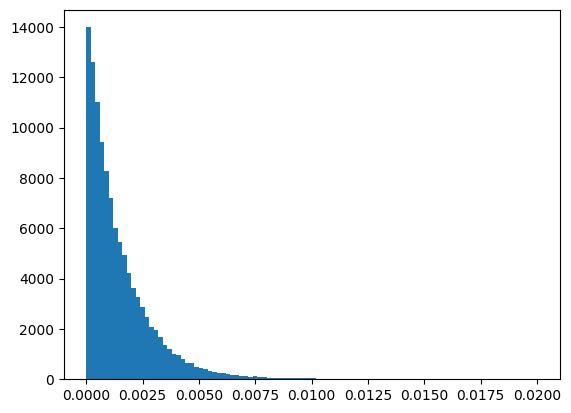

In [32]:
plt.hist(mean_abs_grad.cpu().numpy(), range=(0, 0.02), bins=100)

In [49]:
std = mean_grad.std().item()
r = 3

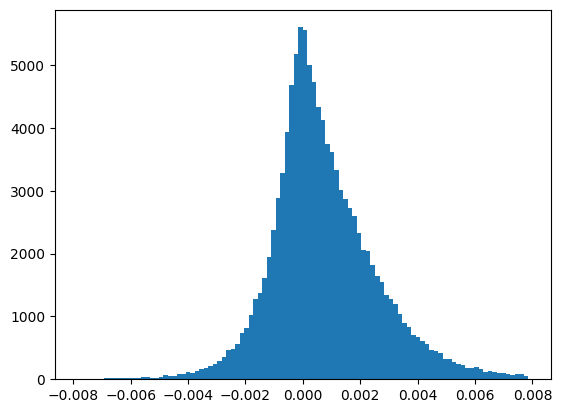

In [50]:
f = plt.hist(mean_grad.cpu().numpy(), bins=100, range=(-r*std, r*std))

In [46]:
med_vals, med_idxs = gs.median(dim=0)

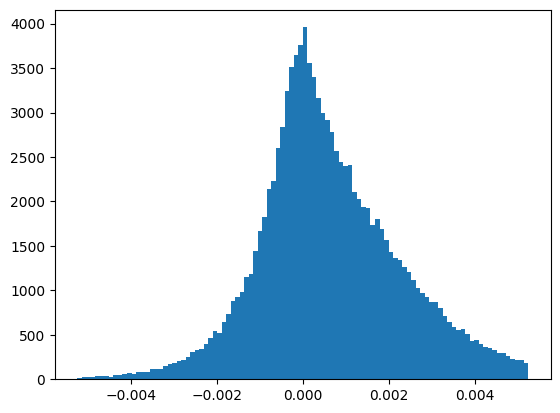

In [47]:
f = plt.hist(med_vals.cpu().numpy(), bins=100, range=(-r*std, r*std))


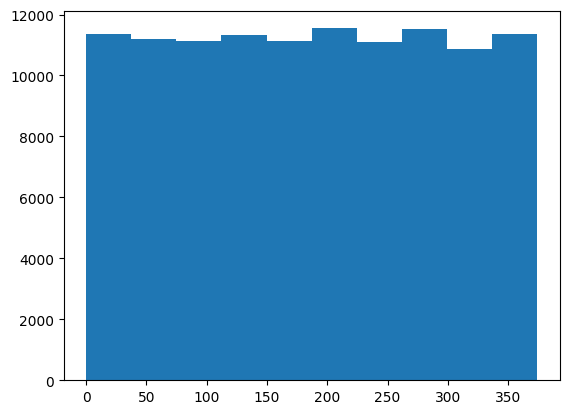

In [48]:
f = plt.hist(med_idxs.cpu().numpy())